In \[38\]:

    import pandas as pd
    import numpy as np

Read in text file and combine details<a href="#Read-in-text-file-and-combine-details" class="anchor-link">¶</a>
===============================================================================================================

In \[39\]:

    #using encoding cp1252, should be good enough for most cases
    #if getting messy characters,then try other encodings
    text_df = pd.read_csv('WTY_FORD_90200400.txt', sep = '\t', names = ["Claim_#", "plant code", "creation date", "index", 
                                                                       "description"], 
                     header = 0, encoding = 'cp1252', on_bad_lines = 'skip', dtype = str)

    text_df = text_df.fillna('')
    del text_df['index']

    #only keep claim numbers that has description
    text_df = text_df[text_df['description'] != '']
    text_df = text_df[text_df['description'].str.startswith('=') == False]

    #group by claim number and join multiple description lines
    text_df['description'] = text_df.groupby(['Claim_#'])['description'].transform(lambda x: ' , '.join(x))
    text_df = text_df.drop_duplicates()
    text_df = text_df.reset_index(drop = True)
    text_df.drop(['plant code'], inplace = True, axis = 1)
    text_df.drop(['creation date'], inplace = True, axis = 1)
    text_df

Out\[39\]:

|     | Claim\_\#    | description                                       |
|-----|--------------|---------------------------------------------------|
| 0   | 200003557854 | CSD baffle missing allowing excess airflow , C... |
| 1   | 200003557855 | CSD leaking, damaged from clamp being over tig... |
| 2   | 200003578721 | CSD cracked, taped together , CUSTOMER STATES ... |
| 3   | 200003595516 | Replaced CSD / evap due to large leak , CHECK ... |
| 4   | 200003480981 | CHECK FOR HISSING NOISE IN FRONT END , road te... |
| ... | ...          | ...                                               |
| 64  | 200002370794 | found intake piping damaged, debris blocking t... |
| 65  | 200002370796 | Performed quick test found DTC P0171 and P0174... |
| 66  | 200002370797 | Found elbow on lower end of air intake hose cr... |
| 67  | 200002528674 | Customer found hose loose under engine guard r... |
| 68  | 200003155032 | CSD cracked resonator , INTAKE HOSE HAD A HOLE... |

69 rows × 2 columns

In \[58\]:

    #commonly used claims data fields
    df = pd.read_excel('textanalysis_data_ford_2017to2021.xlsx', sheet_name = 'Report', header = 9)
    del df[df.columns[0]]
    df.drop(['Unnamed: 2'], inplace = True, axis = 1)
    df.drop(['Unnamed: 13'], inplace = True, axis = 1)
    df.rename(columns = {'Unnamed: 21' : 'Number of claims'}, inplace = True)
    df.rename(columns = {'EUR' : 'amount_claimed'}, inplace = True)
    df = df[df['Mat_#_M+H_installed'] != 'PWYEMA1000'] #dummy part number
    df

Out\[58\]:

|        | Mat\_\#\_M+H\_installed | Claim\_\#    | Date\_Claim\_Crea\_Y/M/D | Date\_Claim\_Crea\_Y/M | Date\_Veh\_Repair\_Y/M | Date\_Veh\_Prod\_Y/M | Veh\_VIN\_\#      | M+H\_Proj\_\#\_new | Cust\_2\_Group\_L2 | M+H\_Plant\_2\_Comp\_Code | M+H\_Plant\_5\_Prod\_Plant | Veh\_Model\_Year | Veh\_Model\_Code | Veh\_Repair\_1\_Country | Veh\_Dealer\_Code | Veh\_mileage\_(km) | Veh\_Oper\_Hours | Months\_in\_Service | Number of claims | amount\_claimed |
|--------|-------------------------|--------------|--------------------------|------------------------|------------------------|----------------------|-------------------|--------------------|--------------------|---------------------------|----------------------------|------------------|------------------|-------------------------|-------------------|--------------------|------------------|---------------------|------------------|-----------------|
| 0      | 0213030002              | 200003722505 | 2021-07-16               | JUL 2021               | FEB 2020               | JUL 2016             | 1F64F5KY1H0A03858 | \#                 | Ford               | MHMX                      | 400                        | 2017             | T/Y3             | USA                     | 4352              | 174255             | 0                | 35                  | 1                | 120.87          |
| 1      | 0213030002              | 200003722507 | 2021-07-16               | JUL 2021               | AUG 2020               | SEP 2017             | 1F65F5KY1J0A08309 | \#                 | Ford               | MHMX                      | 400                        | 2018             | T/Y3             | USA                     | 3819              | 161562             | 0                | 32                  | 1                | 122.31          |
| 2      | 0213030002              | 200003722508 | 2021-07-16               | JUL 2021               | JAN 2019               | JUL 2015             | 1F65F5KY2G0A01426 | \#                 | Ford               | MHMX                      | 400                        | 2016             | T/Y3             | USA                     | 1603              | 201609             | 0                | 42                  | 1                | 622.48          |
| 3      | 0213030002              | 200003722510 | 2021-07-16               | JUL 2021               | JAN 2020               | SEP 2016             | 1F65F5KY2H0A06160 | \#                 | Ford               | MHMX                      | 400                        | 2017             | T/Y3             | USA                     | 6365              | 118132             | 0                | 33                  | 1                | 153.61          |
| 4      | 0213030002              | 200003722511 | 2021-07-16               | JUL 2021               | MAR 2017               | JUL 2015             | 1F65F5KY8G0A01821 | \#                 | Ford               | MHMX                      | 400                        | 2016             | T/Y3             | USA                     | 48985             | 110443             | 0                | 19                  | 1                | 293.49          |
| ...    | ...                     | ...          | ...                      | ...                    | ...                    | ...                  | ...               | ...                | ...                | ...                       | ...                        | ...              | ...              | ...                     | ...               | ...                | ...              | ...                 | ...              | ...             |
| 121599 | UFRFL910S               | 200002367041 | 2018-06-11               | JUN 2018               | Not assigned           | Not assigned         | \#                | \#                 | Ford               | MPUS                      | 559                        | \#               | Not assigned     | Not assigned            | Not assigned      | \#                 | \#               | \#                  | 1                | 0.00            |
| 121600 | UFRFL910S               | 200002644329 | 2019-01-04               | JAN 2019               | Not assigned           | Not assigned         | 1FMCU9GX1EUC25189 | \#                 | Ford               | MPUS                      | 559                        | \#               | Not assigned     | Not assigned            | Not assigned      | \#                 | \#               | \#                  | 1                | 0.00            |
| 121601 | UFRFL910S               | 200002770405 | 2019-04-12               | APR 2019               | Not assigned           | Not assigned         | 3FADP4BJXGM114627 | \#                 | Ford               | MPUS                      | 559                        | \#               | Not assigned     | Not assigned            | Not assigned      | \#                 | \#               | \#                  | 1                | 0.00            |
| 121602 | UFRFL910S               | 200003578729 | 2021-02-04               | FEB 2021               | Not assigned           | Not assigned         | 3FA5POT95FR203822 | \#                 | Ford               | MPUS                      | 559                        | \#               | Not assigned     | Not assigned            | Not assigned      | \#                 | \#               | \#                  | 1                | 0.00            |
| 121603 | UFRKICKOUT              | 200003706809 | 2021-07-15               | JUL 2021               | MAR 2018               | APR 2017             | 1FMCU9GD7HUD70909 | \#                 | Ford               | MHDE                      | 557                        | 2017             | T/M2             | USA                     | 9655              | 9114               | 0                | 9                   | 1                | 52.31           |

113398 rows × 20 columns

In \[66\]:

    #merge description and commonly used fields on claim number
    df['Claim_#'] = df['Claim_#'].astype(str)
    result = df.merge(text_df, how = 'inner', on = 'Claim_#')

    #drop columns that are all missing information
    result = result.replace('Not assigned', np.NaN)
    result = result.replace('#', np.NaN)
    result = result.replace(0, np.NaN)
    result = result.dropna(axis=1, how='all')

    result.to_excel('Text Analysis Ford.xlsx', index = False)

Word Cloud<a href="#Word-Cloud" class="anchor-link">¶</a>
=========================================================

In \[40\]:

    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    import matplotlib.pyplot as plt

In \[73\]:

    comment_words = ''

    #defining stop words
    stopwords = set(STOPWORDS)
    stopwords.update(['test', 'code', 'yes', 'ok', 'tested', 'set', 'now', 'found', 'checked', 'codes', 'replace',
                      'customer', 'states', 'replaced', 'pass', 'performed', 'self', 'returned', 'good', 'vehicle',
                      'order', 'part', 'retested', 'remove', 'present', 'verified', 'driver', 'return', 'concern',
                      'retest', 'drive', 'see', 'check', 'passed', 'verified', 'came', 'removed', 'reset', 'inspected',
                      'confirmed', 'perform', 'verify', 'new', 'problem', 'confirm', 'road', 'drove', 'repair', 'time'])

    #extracting words to display in word cloud
    for w in text_df.description:
        tokens = w.split()
        #excluding single character words like "(" "-" "R" ...
        tokens = [x for x in tokens if len(x) > 1]
        #trandform to lower case
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            
        comment_words += " ".join(tokens) + " "
        
    #creating word cloud
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure()
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

<img src="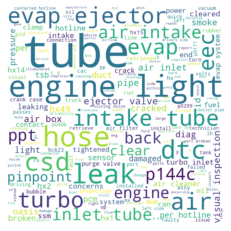%0A" class="jp-needs-light-background" />

In \[74\]:

    wordcloud.to_file("word cloud_ford.png")

Out\[74\]:

    <wordcloud.wordcloud.WordCloud at 0x225134a3e50>

In \[51\]:

    from PIL import Image

In \[75\]:

    #creating a car shaped word cloud
    car_mask = np.array(Image.open("car_mask.png"))
    #transform the background pixels to white
    car_mask[car_mask == 0] = 255

    wc = WordCloud(background_color = "white", mask = car_mask,
                   stopwords = stopwords, contour_width = 3, contour_color = 'steelblue')
    wc.generate(comment_words)

    plt.figure()
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

<img src="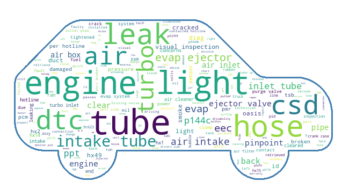%0A" class="jp-needs-light-background" />

In \[76\]:

    wc.to_file("word cloud_ford_car.png")

Out\[76\]:

    <wordcloud.wordcloud.WordCloud at 0x225160f5160>

In \[ \]: